# Problem Definition
Heart disease describes a range of conditions that affect your heart. Today, cardiovascular diseases are the leading cause of death worldwide with 17.9 million deaths annually, as per the World Health Organization reports. Various unhealthy activities are the reason for the increase in the risk of heart disease like high cholesterol, obesity, increase in triglycerides levels, hypertension, etc. There are certain signs which the American Heart Association lists like the persons having sleep issues, a certain increase and decrease in heart rate (irregular heartbeat), swollen legs, and in some cases weight gain occurring quite fast; it can be 1-2 kg daily. All these symptoms resemble different diseases also like it occurs in the aging persons, so it becomes a difficult task to get a correct diagnosis, which results in fatality in near future

Predicting and diagnosing heart disease is the biggest challenge in the medical industry and relies on factors such as the physical examination, symptoms and signs of the patient.
Factors that influence heart disease are body cholesterol levels, smoking habit and obesity, family history of illnesses, blood pressure, and work environment. Machine learning algorithms play an essential and precise role in the prediction of heart disease.



# Possible Solution

Advances in technology allow machine language to combine with Big Data tools to manage unstructured and exponentially growing data. Heart disease is seen as the world’s deadliest disease of human life. In particular, in this type of disease, the heart is not able to push the required amount of blood to the remaining organs of the human body to perform regular functions.

Heart disease can be predicted based on various symptoms such as age, gender, heart rate, etc.
Due to the increasing use of technology and data collection, we can now predict heart disease using machine learning algorithms.

# About Dataset
The dataset used for this research purpose was the Public Health Dataset and it is dating from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The “target” field refers to the presence of heart disease in the patient. It is integer-valued 0 = no disease and 1 = disease. The first four rows and all the dataset features are shown in Table 1 without any preprocessing. Now the attributes which are used in this research purpose are described as follows and for what they are used or resemble:
1.	Age—age of patient in years
2. sex—(1 = male; 0 = female).
3.	Cp—chest pain type.(4 types)
4.	Trestbps—resting blood pressure (in mm Hg on admission to the hospital). The normal range is 120/80 (if you have a normal blood pressure reading, it is fine, but if it is a little higher than it should be, you should try to lower it. Make healthy changes to your lifestyle).
5.	Chol—serum cholesterol shows the amount of triglycerides present. Triglycerides are another lipid that can be measured in the blood. It should be less than 170 mg/dL (may differ in different Labs).
6.	Fbs—fasting blood sugar larger than 120 mg/dl (1 true). Less than 100 mg/dL (5.6 mmol/L) is normal, and 100 to 125 mg/dL (5.6 to 6.9 mmol/L) is considered prediabetes.
7.	Restecg—resting electrocardiographic results.
8.	Thalach—maximum heart rate achieved. The maximum heart rate is 220 minus your age.
9.	Exang—exercise-induced angina (1 yes). Angina is a type of chest pain caused by reduced blood flow to the heart. Angina is a symptom of coronary artery disease.
10.	Oldpeak—ST depression induced by exercise relative to rest.
11.	Slope—the slope of the peak exercise ST segment.
12.	Ca—number of major vessels (0–3) colored by fluoroscopy.
13.	Thal—no explanation provided, but probably thalassemia (3 normal; 6 fixed defects; 7 reversible defects).
14.	Target (T)—no disease = 0 and disease = 1, (angiographic disease status).


In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score,precision_score

In [2]:
# Loading the dataset
df = pd.read_csv('heart.csv')

# **Exploring the dataset**

In [3]:
print("Shape of the dataset is:")
df.shape

Shape of the dataset is:


(303, 14)

In [4]:
print("Columns in the dataset are: ",df.columns)

Columns in the dataset are:  Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
print("First 5 instances of the dataset:")
df.head()

First 5 instances of the dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
print("Last 5 instances of the dataset:")
df.tail()

Last 5 instances of the dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
# Checking for null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# Basic statistics about the dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# **Data Visualization**

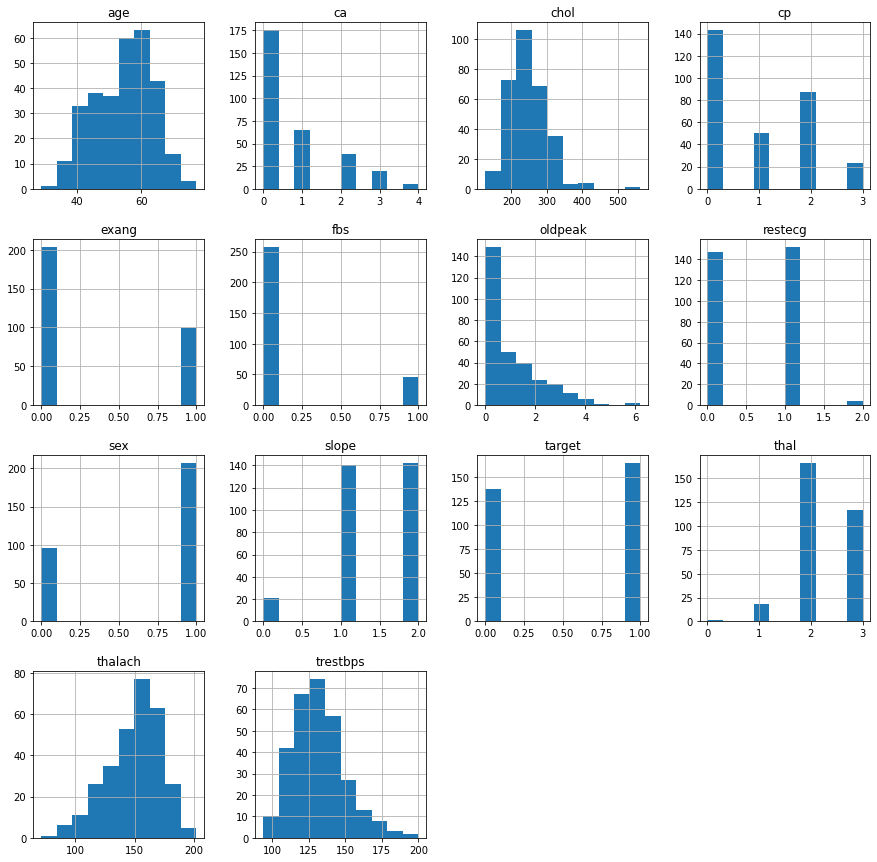

In [10]:
# Plotting histogram for the entire dataset
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
g = df.hist(ax=ax)

1    165
0    138
Name: target, dtype: int64


Text(0, 0.5, 'Count')

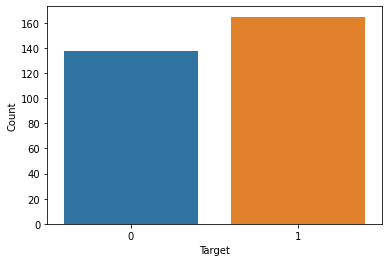

In [11]:
# Visualization to check if the dataset is balanced or not
print(df['target'].value_counts())
g = sns.countplot(x='target', data=df)
plt.xlabel('Target')
plt.ylabel('Count')

# **Feature Engineering**

### Feature Selection

<AxesSubplot:>

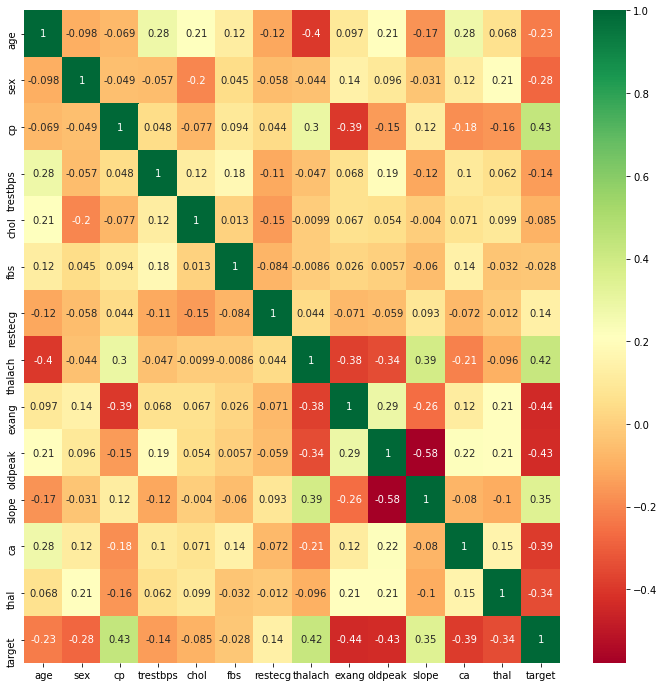

In [12]:
# Get correlation of all the features of the dataset
corr_matrix = df.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(12,12))
sns.heatmap(data=df.corr(), annot=True, cmap='RdYlGn')

In [13]:
corr_matrix['target']

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
target      1.000000
Name: target, dtype: float64

# **Data Preprocessing**

## Handling categorical features

After exploring the dataset, I observed that converting the categorical variables into dummy variables using 'get_dummies()'. Though we don't have any strings in our dataset it is necessary to convert ('sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal') these features.

In [14]:
dataset = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

## Feature Scaling

In [18]:
dataset.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [16]:
# Splitting the dataset into dependent and independent features
X = dataset.drop('target', axis=1)
y = dataset['target']

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [19]:
from sklearn.preprocessing import StandardScaler
standScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
X_train[columns_to_scale] = standScaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = standScaler.transform(X_test[columns_to_scale])

In [20]:
X_train.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
132,-1.356798,-0.616856,0.914034,0.532781,-0.920864,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
202,0.385086,1.169491,0.439527,-1.753582,-0.193787,0,1,1,0,0,...,1,1,0,0,0,0,0,0,0,1
196,-0.921327,1.169491,-0.300704,-0.139679,2.350982,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
75,0.058483,0.276318,0.059921,0.487950,0.351521,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
176,0.602822,-0.795490,-0.319684,0.443119,0.351521,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1


In [21]:
X_test.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
179,0.276218,1.169491,0.553408,-1.708752,-0.375556,0,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
228,0.493954,2.360389,0.781172,0.398289,-0.739095,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
111,0.276218,1.169491,-2.293633,1.025918,-0.739095,0,1,0,0,1,...,1,0,1,0,0,0,0,0,0,1
246,0.167350,0.216773,3.077785,-0.005187,0.805944,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
60,1.800367,-1.212304,0.344625,-0.901800,-0.920864,1,0,0,0,1,...,1,0,1,0,0,0,0,0,1,0


# **Model Building**

I will be experimenting with 3 algorithms:
1. KNeighbors Classifier
2. Decision Tree Classifier
3. Random Forest Classifier
4. Logistic Regression
5. SVC(SVM)

## KNeighbors Classifier Model

In [22]:
# Finding the best accuracy for knn algorithm using cross_val_score 
knn_scores = []
for i in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors=i)
    cvs_scores = cross_val_score(knn_classifier, X_train, y_train, cv=10)
    knn_scores.append(round(cvs_scores.mean(),3))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

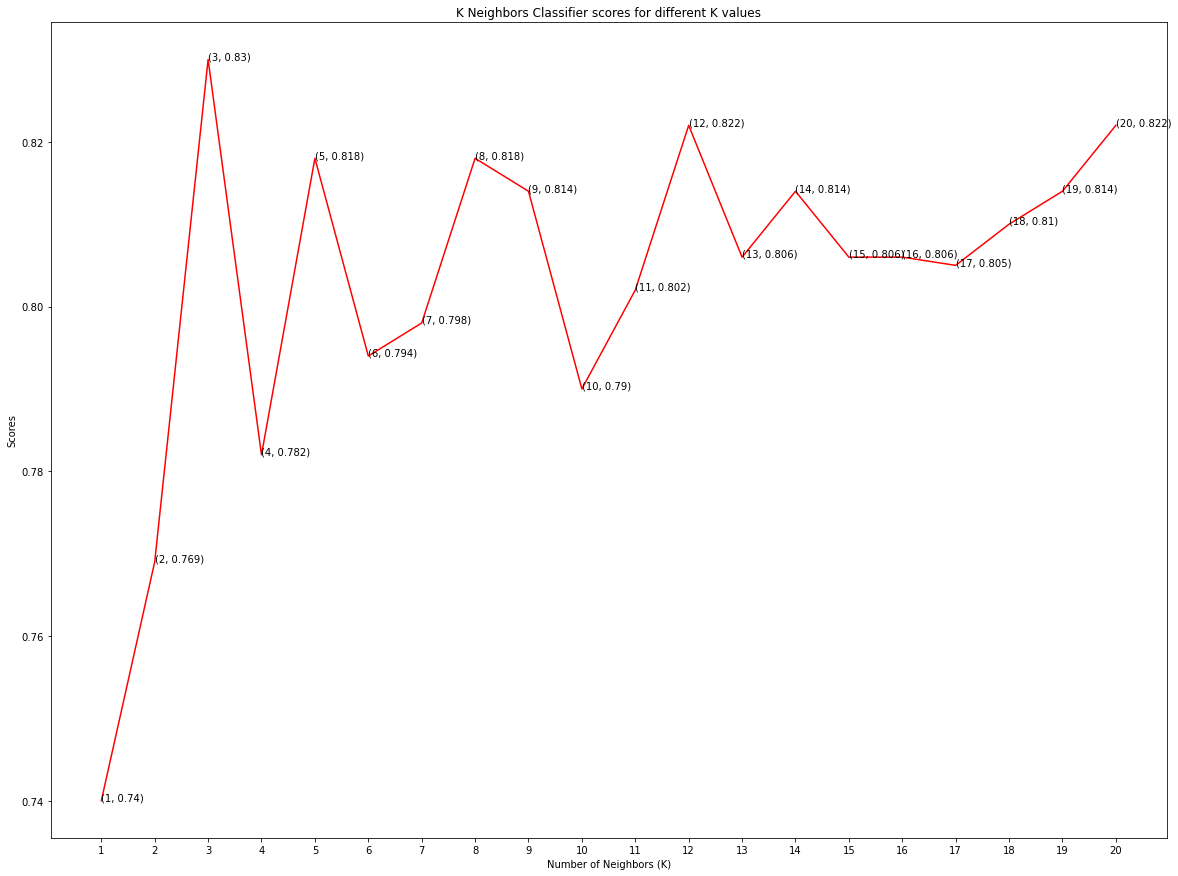

In [23]:
# Plotting the results of knn_scores
plt.figure(figsize=(20,15))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

Accurracy score of KNeighborsClassifier is :  0.8524590163934426
Classification Report for KNN is: 
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61

Confusion Matrix:


<AxesSubplot:>

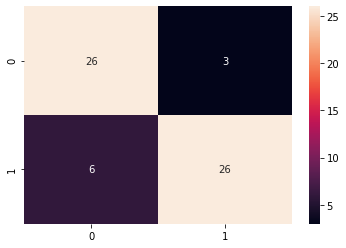

In [24]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train,y_train)
knn_pred = knn_classifier.predict(X_test)
print("Accurracy score of KNeighborsClassifier is : ",accuracy_score(y_test,knn_pred))
print("Classification Report for KNN is: ")
print(classification_report(y_test,knn_pred))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test,knn_pred),annot=True)

## Decision Tree Classifier

In [25]:
# Finding the best accuracy for decision tree algorithm using cross_val_score 
decision_scores = []
for i in range(1, 11):
    decision_classifier = DecisionTreeClassifier(max_depth=i)
    cvs_scores = cross_val_score(decision_classifier, X_train, y_train, cv=10)
    decision_scores.append(round(cvs_scores.mean(),3))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different depth values')

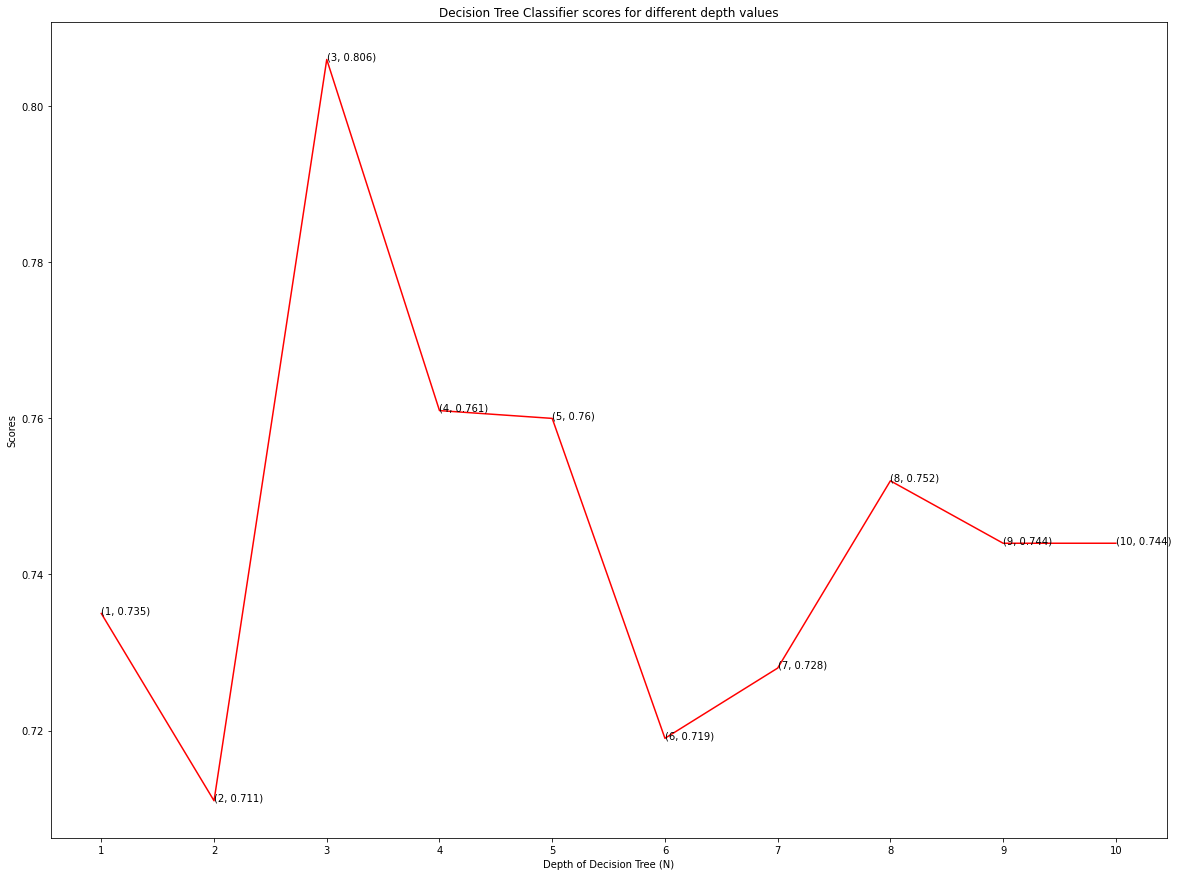

In [26]:
# Plotting the results of decision_scores
plt.figure(figsize=(20,15))
plt.plot([i for i in range(1, 11)], decision_scores, color = 'red')
for i in range(1,11):
    plt.text(i, decision_scores[i-1], (i, decision_scores[i-1]))
plt.xticks([i for i in range(1, 11)])
plt.xlabel('Depth of Decision Tree (N)')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different depth values')

Accurracy score of KNeighborsClassifier is :  0.819672131147541
Classification Report for KNN is: 
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

Confusion Matrix:


<AxesSubplot:>

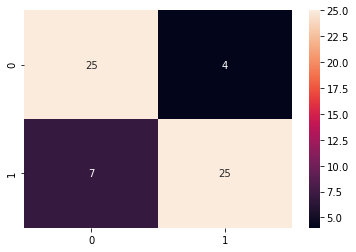

In [27]:
decision_classifier = DecisionTreeClassifier(max_depth=3)
decision_classifier.fit(X_train,y_train)
dt_pred = decision_classifier.predict(X_test)
print("Accurracy score of KNeighborsClassifier is : ",accuracy_score(y_test,dt_pred))
print("Classification Report for KNN is: ")
print(classification_report(y_test,dt_pred))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test,dt_pred),annot=True)

## Random Forest Classifier

In [28]:
# Finding the best accuracy for random forest algorithm using cross_val_score 
forest_scores = []
for i in range(10, 101, 10):
  forest_classifier = RandomForestClassifier(n_estimators=i)
  cvs_scores = cross_val_score(forest_classifier, X_train, y_train, cv=5)
  forest_scores.append(round(cvs_scores.mean(),3))

Text(0.5, 1.0, 'Random Forest Classifier scores for different N values')

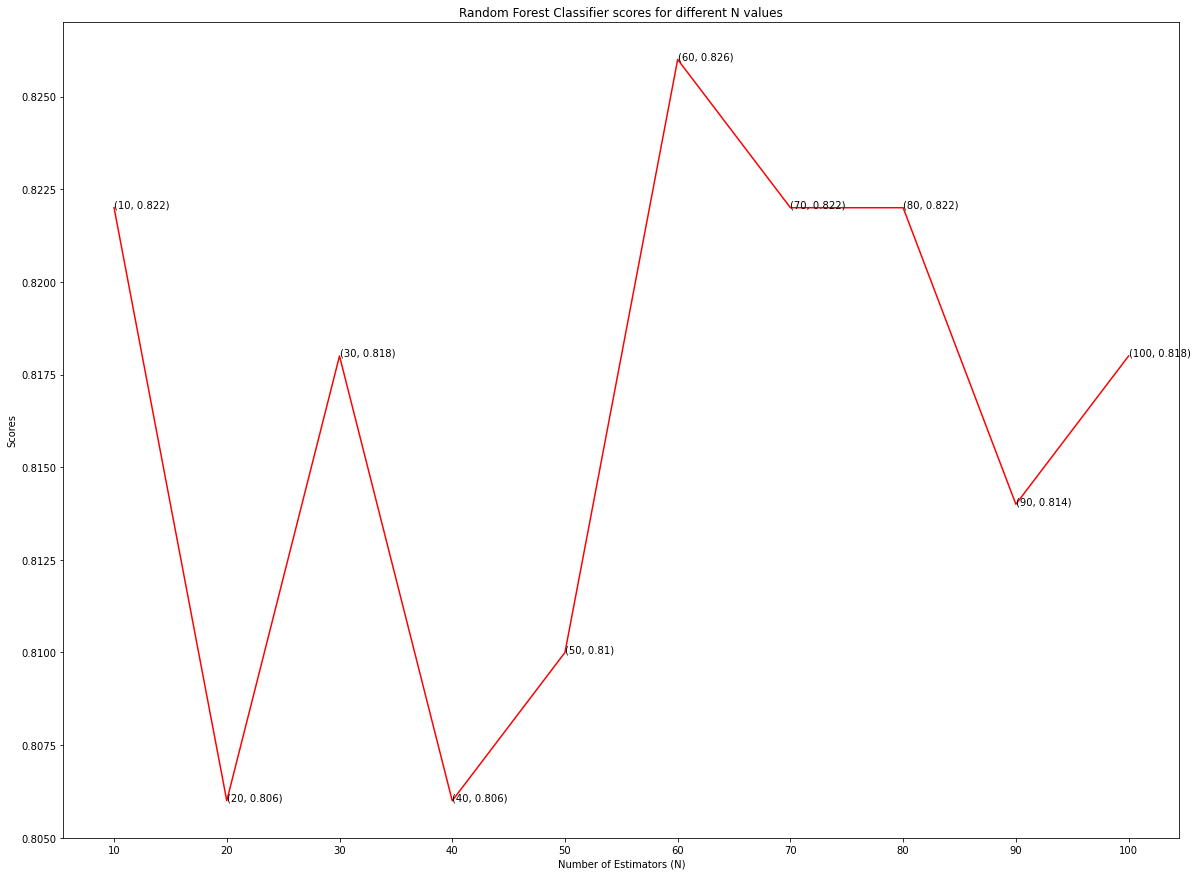

In [29]:
# Plotting the results of forest_scores
plt.figure(figsize=(20,15))
plt.plot([n for n in range(10, 101, 10)], forest_scores, color = 'red')
for i in range(1,11):
    plt.text(i*10, forest_scores[i-1], (i*10, forest_scores[i-1]))
plt.xticks([i for i in range(10, 101, 10)])
plt.xlabel('Number of Estimators (N)')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different N values')

Accurracy score of KNeighborsClassifier is :  0.8524590163934426
Classification Report for Random Forest Classifier is: 
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Confusion Matrix:


<AxesSubplot:>

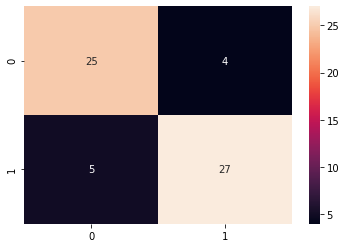

In [30]:
# Training the random forest classifier model with n value as 60
forest_classifier = RandomForestClassifier(n_estimators=60)
forest_classifier.fit(X_train,y_train)
rf_pred = forest_classifier.predict(X_test)
print("Accurracy score of KNeighborsClassifier is : ",accuracy_score(y_test,rf_pred))
print("Classification Report for Random Forest Classifier is: ")
print(classification_report(y_test,rf_pred))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test,rf_pred),annot=True)

## Logistic Regression

In [31]:
logistic_scores = []
for c in [0.01,0.1,1,10,20,30]:
    logistic_classifier = LogisticRegression(C=c)
    cvs_scores = cross_val_score(logistic_classifier, X_train, y_train, cv=5)
    logistic_scores.append(round(cvs_scores.mean(),3))

Text(0.5, 1.0, 'Logistic Regression scores for different C values')

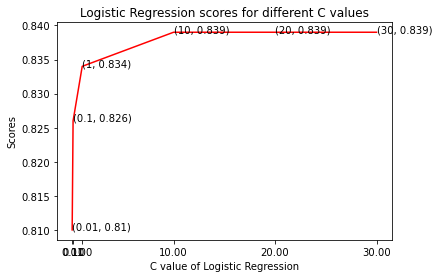

In [32]:
# Plotting the results of decision_scores
# plt.figure(figsize=(20,15))
plt.plot([0.01,0.1,1,10,20,30], logistic_scores, color = 'red')
for i in range(1,7):
    plt.text([0.01,0.1,1,10,20,30][i-1], logistic_scores[i-1], ([0.01,0.1,1,10,20,30][i-1], logistic_scores[i-1]))

plt.xticks([0.01,0.1,1,10,20,30])
plt.xlabel('C value of Logistic Regression')
plt.ylabel('Scores')
plt.title('Logistic Regression scores for different C values')

Accurracy score of Logistic Regression is :  0.8852459016393442
Classification Report for Logistic Regression is: 
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

Confusion Matrix:


<AxesSubplot:>

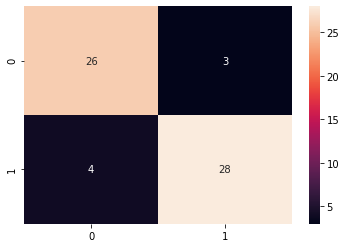

In [33]:
logistic_classifier = LogisticRegression(C = 10)
logistic_classifier.fit(X_train,y_train)
lr_pred = logistic_classifier.predict(X_test)
print("Accurracy score of Logistic Regression is : ",accuracy_score(y_test,lr_pred))
print("Classification Report for Logistic Regression is: ")
print(classification_report(y_test,lr_pred))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test,lr_pred),annot=True)

Accurracy score of SVC is :  0.9016393442622951
Classification Report for SVC is: 
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Confusion Matrix:


<AxesSubplot:>

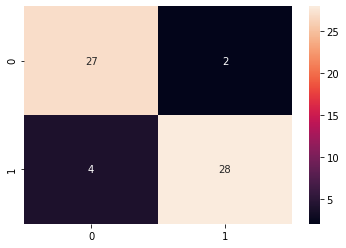

In [34]:
svc = SVC()
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
print("Accurracy score of SVC is : ",accuracy_score(y_test,svc_pred))
print("Classification Report for SVC is: ")
print(classification_report(y_test,svc_pred))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test,svc_pred),annot=True)

In [35]:
accuracy_scores = [accuracy_score(y_test,lr_pred),accuracy_score(y_test,knn_pred),accuracy_score(y_test,dt_pred)
                   ,accuracy_score(y_test,svc_pred),accuracy_score(y_test,rf_pred)]
recall_scores = [recall_score(y_test,lr_pred),recall_score(y_test,knn_pred),recall_score(y_test,dt_pred)
                   ,recall_score(y_test,svc_pred),recall_score(y_test,rf_pred)]
precision_scores = [precision_score(y_test,lr_pred),precision_score(y_test,knn_pred),precision_score(y_test,dt_pred)
                   ,precision_score(y_test,svc_pred),precision_score(y_test,rf_pred)]
labels = ['Logistic Regression','KNearestNeighborsClassifier','DecisionTreeClassifier',
          'SupportVectorMachineClassifier','RandomForestClassifier']
acc_pd = pd.DataFrame(accuracy_scores,index=labels,columns=['accuracy_score'])
rec_pd = pd.DataFrame(recall_scores,index=labels,columns=['recall_score'])
prec_pd = pd.DataFrame(precision_scores,index=labels,columns=['precision_score'])

test_metrics = pd.concat([acc_pd,rec_pd,prec_pd],axis=1)

In [36]:
test_metrics

,accuracy_score,recall_score,precision_score
Logistic Regression,0.885246,0.87500,0.903226
KNearestNeighborsClassifier,0.852459,0.81250,0.896552
DecisionTreeClassifier,0.819672,0.78125,0.862069
SupportVectorMachineClassifier,0.901639,0.87500,0.933333
RandomForestClassifier,0.852459,0.84375,0.870968


([<matplotlib.axis.XTick at 0x1c0c0363e50>,
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'KNearestNeighborsClassifier'),
  Text(2, 0, 'DecisionTreeClassifier'),
  Text(3, 0, 'SupportVectorMachineClassifier'),
  Text(4, 0, 'RandomForestClassifier')])

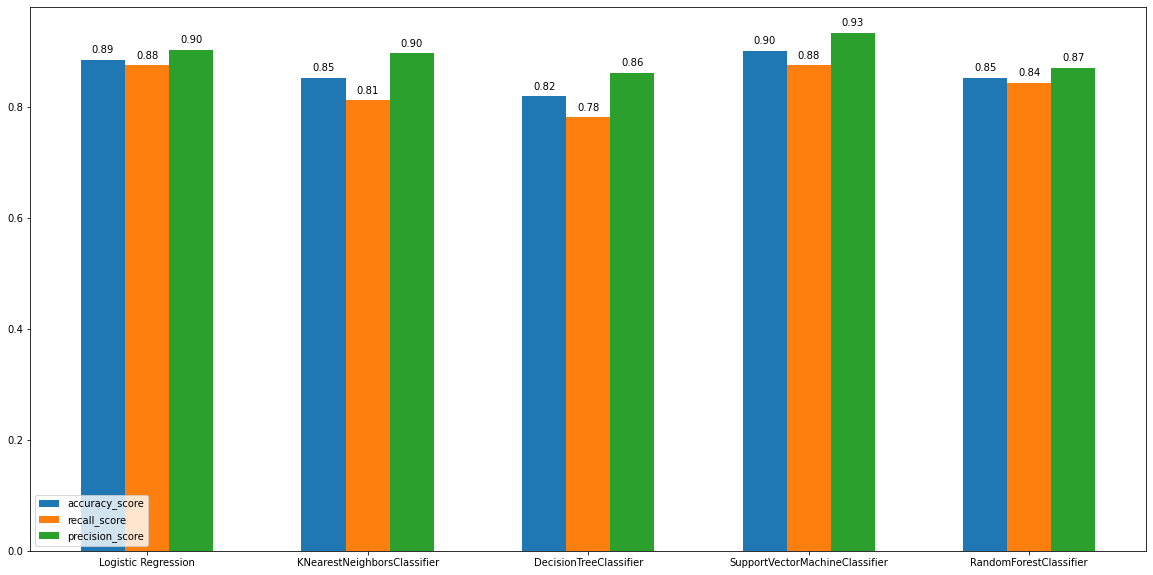

In [37]:
def autoLabel(plt,rects):
    for rect in rects:
        height = rect.get_height()
#         print(height)
        plt.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '%.2f' % height,
                ha='center', va='bottom')

plt.figure(figsize=(20,10))
X_axis = np.arange(len(test_metrics.index))
rect1 = plt.bar(X_axis - 0.2,test_metrics['accuracy_score'],width=0.2,label='accuracy_score')
autoLabel(plt,rect1)

rect2 = plt.bar(X_axis + 0,test_metrics['recall_score'],width=0.2,label='recall_score')
autoLabel(plt,rect2)

rect3 = plt.bar(X_axis + 0.2,test_metrics['precision_score'],width=0.2,label='precision_score')
autoLabel(plt,rect3)

plt.legend(loc=3)
plt.xticks(X_axis, test_metrics.index)